In [21]:
import numpy as np
temp_list = np.array(range(255))
print(temp_list)
print(temp_list / 255.0)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [1]:
# 신경망 모델의 시각화 및 소실 곡선 - 최적화된값을 찾기위함

In [22]:
from tensorflow import keras
(x,y),(xt,yt) =  keras.datasets.fashion_mnist.load_data()
x.shape, y.shape, xt.shape,yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [25]:
# 데이터 표준화 0 ~ 1
x_scaled = x / 255.0

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_target,y_train,y_target =  train_test_split(x_scaled,y)
x_train.shape,x_target.shape,y_train.shape,y_target.shape

((45000, 28, 28), (15000, 28, 28), (45000,), (15000,))

In [32]:
# 신경망 모델을 만드는 함수를 작성
def make_model(layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if layer:
        model.add(layer)
    model.add(keras.layers.Dense(10,activation = 'softmax'))
    return model

In [31]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
history =  model.fit(x_train,y_train, epochs=5,verbose=1)

Epoch 1/5
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2410 - accuracy: 0.9105
Epoch 2/5
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2347 - accuracy: 0.9119
Epoch 3/5
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2275 - accuracy: 0.9157
Epoch 4/5
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2209 - accuracy: 0.9185
Epoch 5/5
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2128 - accuracy: 0.9206


In [50]:
history.history

{'loss': [0.24103200435638428,
  0.23465965688228607,
  0.22754718363285065,
  0.22087906301021576,
  0.21276214718818665],
 'accuracy': [0.9105333089828491,
  0.911911129951477,
  0.9156666398048401,
  0.9185110926628113,
  0.9206222295761108]}

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

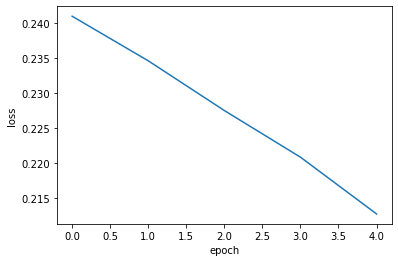

In [52]:
import matplotlib.pyplot as plt
list_temp = history.history['loss']
plt.plot(list_temp)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()